In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [120]:
# Loading Data

In [131]:

from sklearn.datasets import load_boston
boston= load_boston()
bos=pd.DataFrame(boston.data, columns=boston.feature_names)

In [132]:
bos['PRICE'] = boston.target

In [133]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [134]:
# InSights

In [135]:
bos.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [136]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [137]:
#EDA

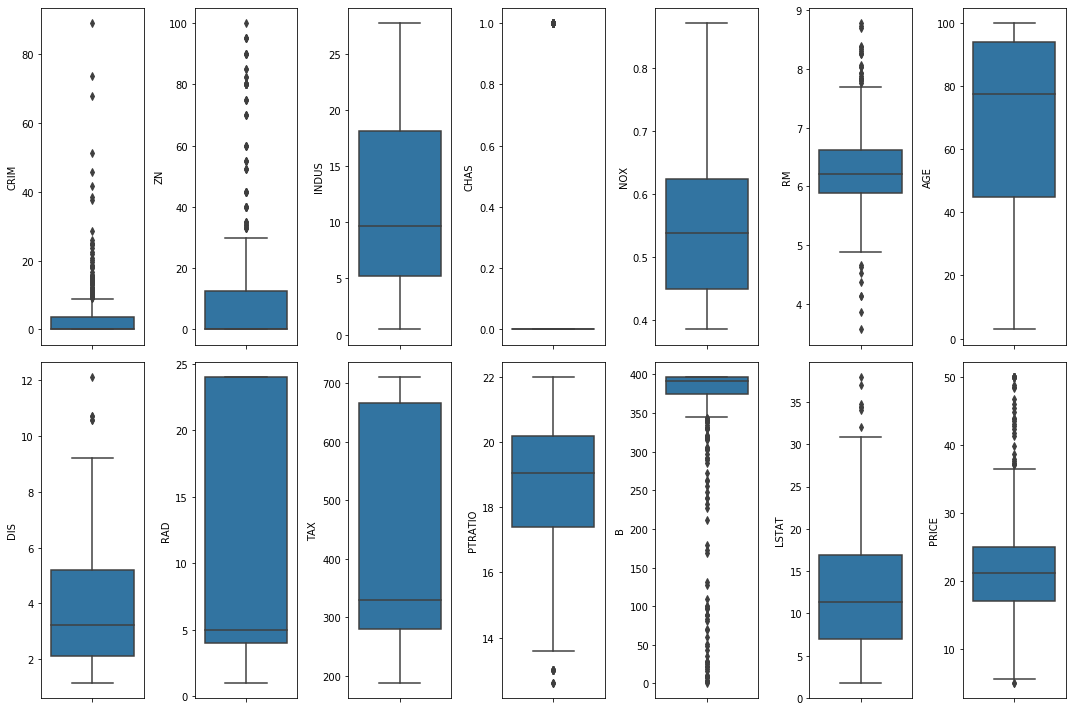

In [138]:


# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(15, 10))
index = 0
ax = ax.flatten()

for col, value in bos.items():
    sns.boxplot(y=col, data=bos, ax=ax[index])
    index += 1
plt.tight_layout()



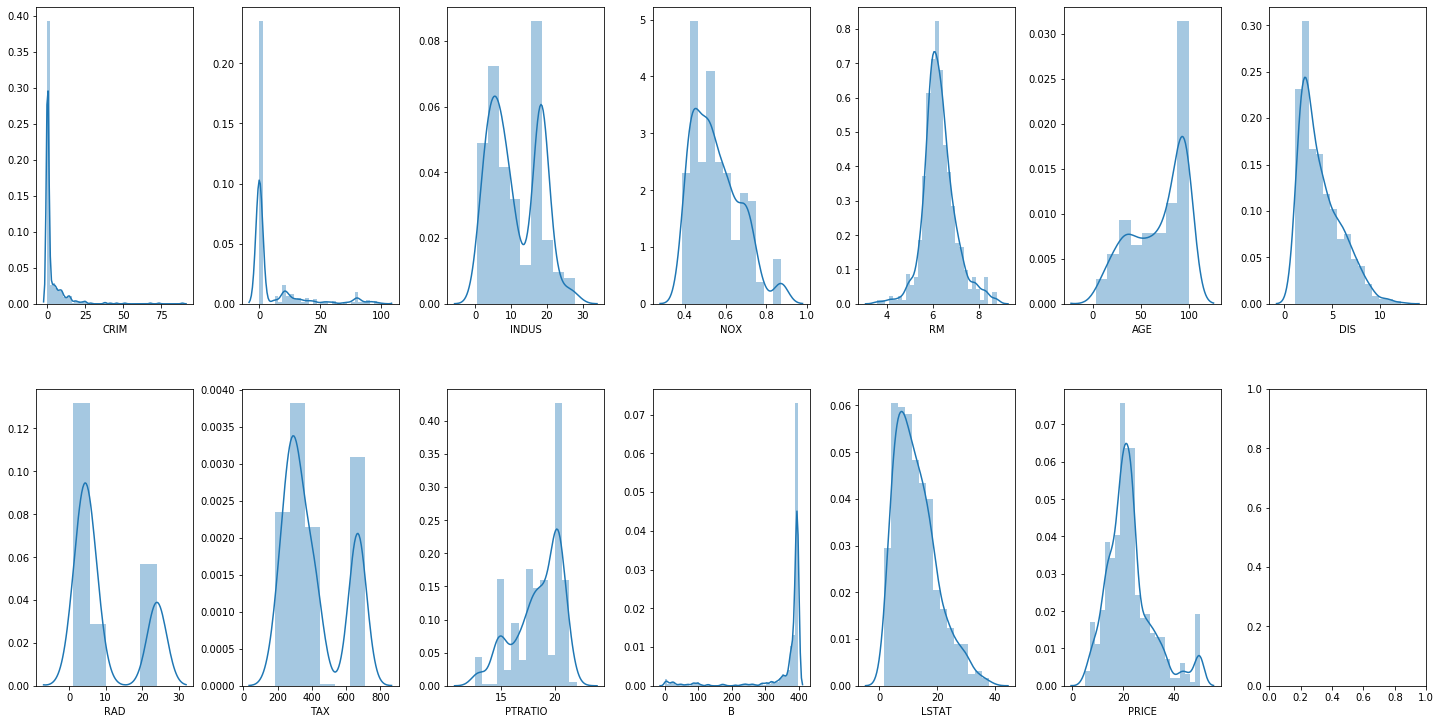

In [142]:
bos1 = bos.drop(['CHAS'], axis= 1)

# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in bos1.items():
    sns.distplot(bos1[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)



In [140]:
corr= bos.corr().round(2)

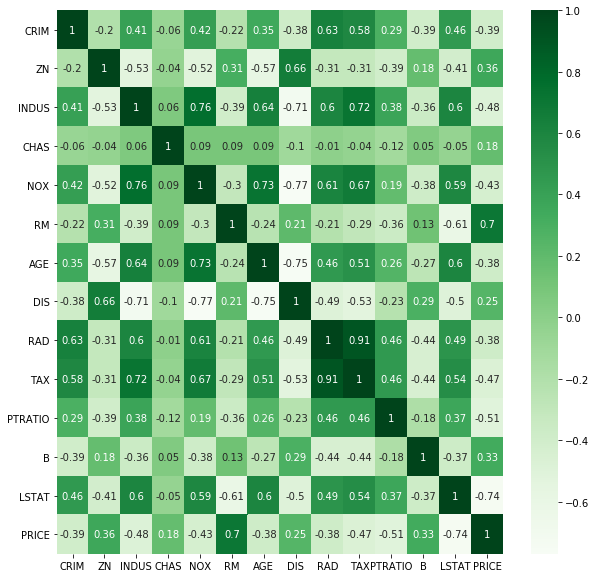

In [141]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True, cmap='Greens')

In [144]:
# Observations:
# 1) TAX and RAD has Higger Corr so, we are dropping RAD
# 2) we see so many colums are skewe so, we need to apply MIN MAX or Standard Normalization based on fileld.

In [145]:
bos= bos.drop(['RAD'], axis =1)

In [146]:
x= bos.drop(['PRICE'], axis=1)
y= bos['PRICE']

In [147]:
scaler =StandardScaler()
x = scaler.fit_transform(x)

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = bos.drop(['PRICE'], axis=1).columns
vif

,VIF,Features
0,1.664471,CRIM
1,2.273018,ZN
2,3.682265,INDUS
3,1.061561,CHAS
4,4.304929,NOX
5,1.885425,RM
6,3.083009,AGE
7,3.954951,DIS
8,3.415289,TAX
9,1.734873,PTRATIO


In [165]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=50)

In [166]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
# saving the model to the local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [168]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[.06,11.0,5.0,0,.5,10.0,70.0,5.0,250,20.0,400.4,10.2]]))
a

array([38.10311013])

In [169]:
regression.score(x_train,y_train)

0.7353379771537907

In [170]:
regression.score(x_test,y_test)

0.6926419809794425

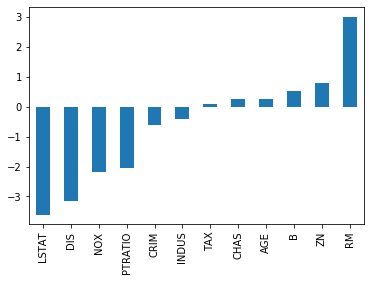

In [178]:
coef = pd.Series(regression.coef_, bos.drop(['PRICE'], axis=1).columns).sort_values()
coef.plot(kind='bar')
